In [ ]:
#Problem Statement
"""
We have a huge number of comments from YouTube for a latest trailer from a worldwide production house, you as an AI
service provider are supposed to analyse all the comments on that trailer, get the sentiment and the score, and give
a consolidated report for that trailer about how it might perform on the box office.
"""

In [ ]:
#Tools and high level steps that will be used in the project.
"""
1. Get your comments from the Youtube trailer. One option would manually getting the comments, get them directly from the API, you can save them in a file and
load it in your colab.

2.Setup your colab to do the job for you, you will need to install the required libraries.
PyTorch - torch
HuggingFace - transformers
NLTK - nltk
VADER - sentiment.vader

"""

In [ ]:
"""
1.Do all the necessary imports
2.create a function for removing stop words
3.create a function to calculate the sentiment score and the sentiment(positive/negative)
4.Loop through the Comments that you will get from your input excel file
4.5 Seggreate the words into positive and negative, so you can make a word cloud at the end
5.Calculate all the sentiments in loop and return only one final result

"""

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install transformers

In [ ]:
!pip install nltk

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import nltk
#from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from transformers import pipeline

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sia = SentimentIntensityAnalyzer()
stop_words = stop_words = set(stopwords.words('english'))
classifier = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
import pandas as pd
df = pd.read_excel("/content/SnowWhite Comments.xlsx")


In [ ]:
comments = []
comments = df['Comments'].tolist()

In [ ]:
def remove_stopwords(raw_comment):
  tokenized_comment = word_tokenize(raw_comment)
  processed_comment = [ word for word in tokenized_comment if word.lower() not in stop_words]
  return ' '.join(processed_comment)

In [ ]:
def get_comment_sentiment_details(raw_comment):
  processed_comment = remove_stopwords(raw_comment)

  words = processed_comment.split()
  positive_words = ""
  negative_words = ""
  comment_sentiment = "" #Either POSITIVE or NEGATIVE

  sentence_score_temp = sia.polarity_scores(processed_comment)

  abs_sentence_score = abs(sentence_score_temp['compound']) #absolute means if I have -3.4 -> 3.4
  sentiment_label = classifier(processed_comment)
  comment_sentiment = sentiment_label[0]['label']

  if abs_sentence_score == 0:
    comment_sentiment = "NEUTRAL"

  if comment_sentiment == "NEGATIVE":
    sentence_score = abs_sentence_score * -1
    for word in words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] < 0:
        negative_words += word + " "

  elif comment_sentiment == "POSITIVE":
    sentence_score = abs_sentence_score
    for word in words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] > 0:
        positive_words += word + " "
  else:
    sentence_score = abs_sentence_score

  return positive_words, negative_words, sentence_score, comment_sentiment

In [ ]:
positive_words = ""
negative_words = ""
neu_count = 0

pos_values_list = []
neg_values_list = []
avg_pos_score = 0
avg_neg_score = 0

for comment in comments:
  pw, nw, ss, cs = get_comment_sentiment_details(comment)
  positive_words += pw+ " " #storing pw from each comment into our central positive words
  negative_words += nw+ " "

  if cs == "NEGATIVE":
    neg_values_list.append(ss)
  elif cs == "POSITIVE":
    pos_values_list.append(ss)
  else:
    neu_count+=1

try:
  avg_pos_score = sum(pos_values_list) / len(pos_values_list)
  avg_neg_score = sum(neg_values_list) / len(neg_values_list)
except ZeroDivisionError:
  if len(pos_values_list) == 0 or len(neg_values_list) == 0:
    avg_pos_score = 0
    avg_neg_score = 0

final_score = (avg_pos_score + avg_neg_score) / (len(pos_values_list) + len(neg_values_list))

In [ ]:
print(final_score)

0.0023106914414414447


In [ ]:
positive_words

'   Yay   hope      beauty true beauty beautiful yes beautiful  Pretty  hope                  credit brave open😂    greatest     true   prettier 😂         likes     great ❤  Admit          lover hope       hope win     supportive masterpiece   romantic Marvel 😅          admit admire bravery     save       great want original original  Well giving  love    thank   Jokes great   '

In [ ]:
negative_words

'poison     broke   hate        mess 🙁👎🏽  insult    stop stop  disappointed  dislike  dislikes. bomb  destroy  cruelty  bad   bad       seriously    madness WORST DOOM  DROP DISLIKE LEAVE      stop propaganda    CGI….😭   mad 😠🤬😂    worst     Bad Bad    poor    abused  empty   poor  Nah scream      cut  😢😂    lost     lowest destroy  dumpster fire    sucks  horrendous awful        flop           Dislikes   evil  '

In [ ]:
avg_pos_score

0.5963791666666668

In [ ]:
avg_neg_score

-0.4253879999999999

In [ ]:
!pip install wordcloud

positives


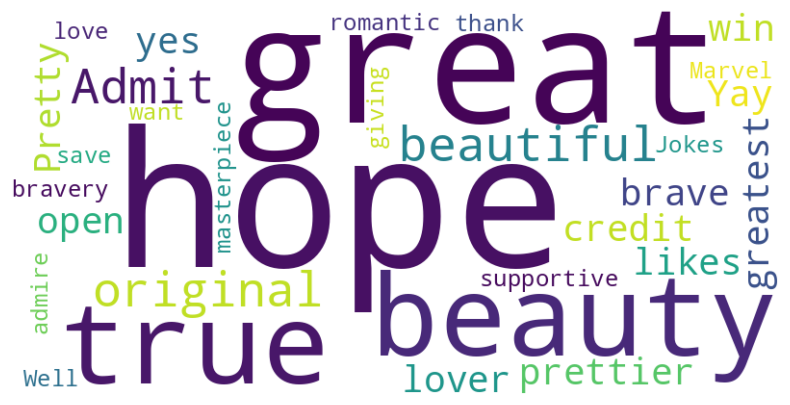

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("positives")
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

negatives


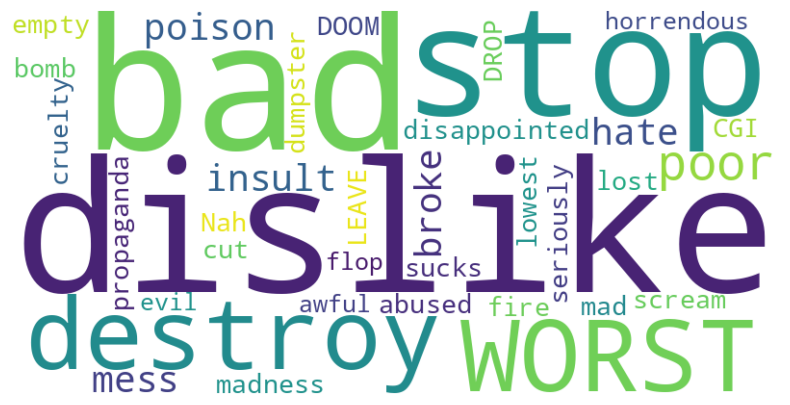

In [ ]:
print("negatives")
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()